In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("BIKE DETAILS.csv")

In [3]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
print(df['seller_type'].unique())
print(df['owner'].unique())

['Individual' 'Dealer']
['1st owner' '2nd owner' '3rd owner' '4th owner']


In [5]:
##check missing values
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [6]:
from pandas_profiling import ProfileReport
import pandas_profiling

In [7]:
df_profile = df.profile_report()

In [8]:
df_profile

In [9]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [10]:
final_dataset=df[['selling_price', 'year', 'seller_type', 'owner', 'km_driven',]]

In [11]:
final_dataset['Current Year']=2020

In [12]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['year']

In [13]:
final_dataset.head()

,selling_price,year,seller_type,owner,km_driven,Current Year,no_year
0,175000,2019,Individual,1st owner,350,2020,1
1,45000,2017,Individual,1st owner,5650,2020,3
2,150000,2018,Individual,1st owner,12000,2020,2
3,65000,2015,Individual,1st owner,23000,2020,5
4,20000,2011,Individual,2nd owner,21000,2020,9


In [14]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [15]:
final_dataset.head()

,selling_price,year,km_driven,Current Year,no_year,seller_type_Individual,owner_2nd owner,owner_3rd owner,owner_4th owner
0,175000,2019,350,2020,1,1,0,0,0
1,45000,2017,5650,2020,3,1,0,0,0
2,150000,2018,12000,2020,2,1,0,0,0
3,65000,2015,23000,2020,5,1,0,0,0
4,20000,2011,21000,2020,9,1,1,0,0


In [16]:
final_dataset=final_dataset.drop(['Current Year','year'],axis=1)

In [17]:
final_dataset.head()

,selling_price,km_driven,no_year,seller_type_Individual,owner_2nd owner,owner_3rd owner,owner_4th owner
0,175000,350,1,1,0,0,0
1,45000,5650,3,1,0,0,0
2,150000,12000,2,1,0,0,0
3,65000,23000,5,1,0,0,0
4,20000,21000,9,1,1,0,0


In [18]:
final_dataset.corr()

,selling_price,km_driven,no_year,seller_type_Individual,owner_2nd owner,owner_3rd owner,owner_4th owner
selling_price,1.000000,-0.212937,-0.402188,0.017382,-0.025555,-0.007113,0.055537
km_driven,-0.212937,1.000000,0.288675,-0.001314,0.034593,-0.002118,0.286008
no_year,-0.402188,0.288675,1.000000,-0.050293,0.152473,0.144011,0.076799
seller_type_Individual,0.017382,-0.001314,-0.050293,1.000000,-0.051213,0.007719,0.004016
owner_2nd owner,-0.025555,0.034593,0.152473,-0.051213,1.000000,-0.037064,-0.019283
owner_3rd owner,-0.007113,-0.002118,0.144011,0.007719,-0.037064,1.000000,-0.005450
owner_4th owner,0.055537,0.286008,0.076799,0.004016,-0.019283,-0.005450,1.000000


In [19]:
import seaborn as sns

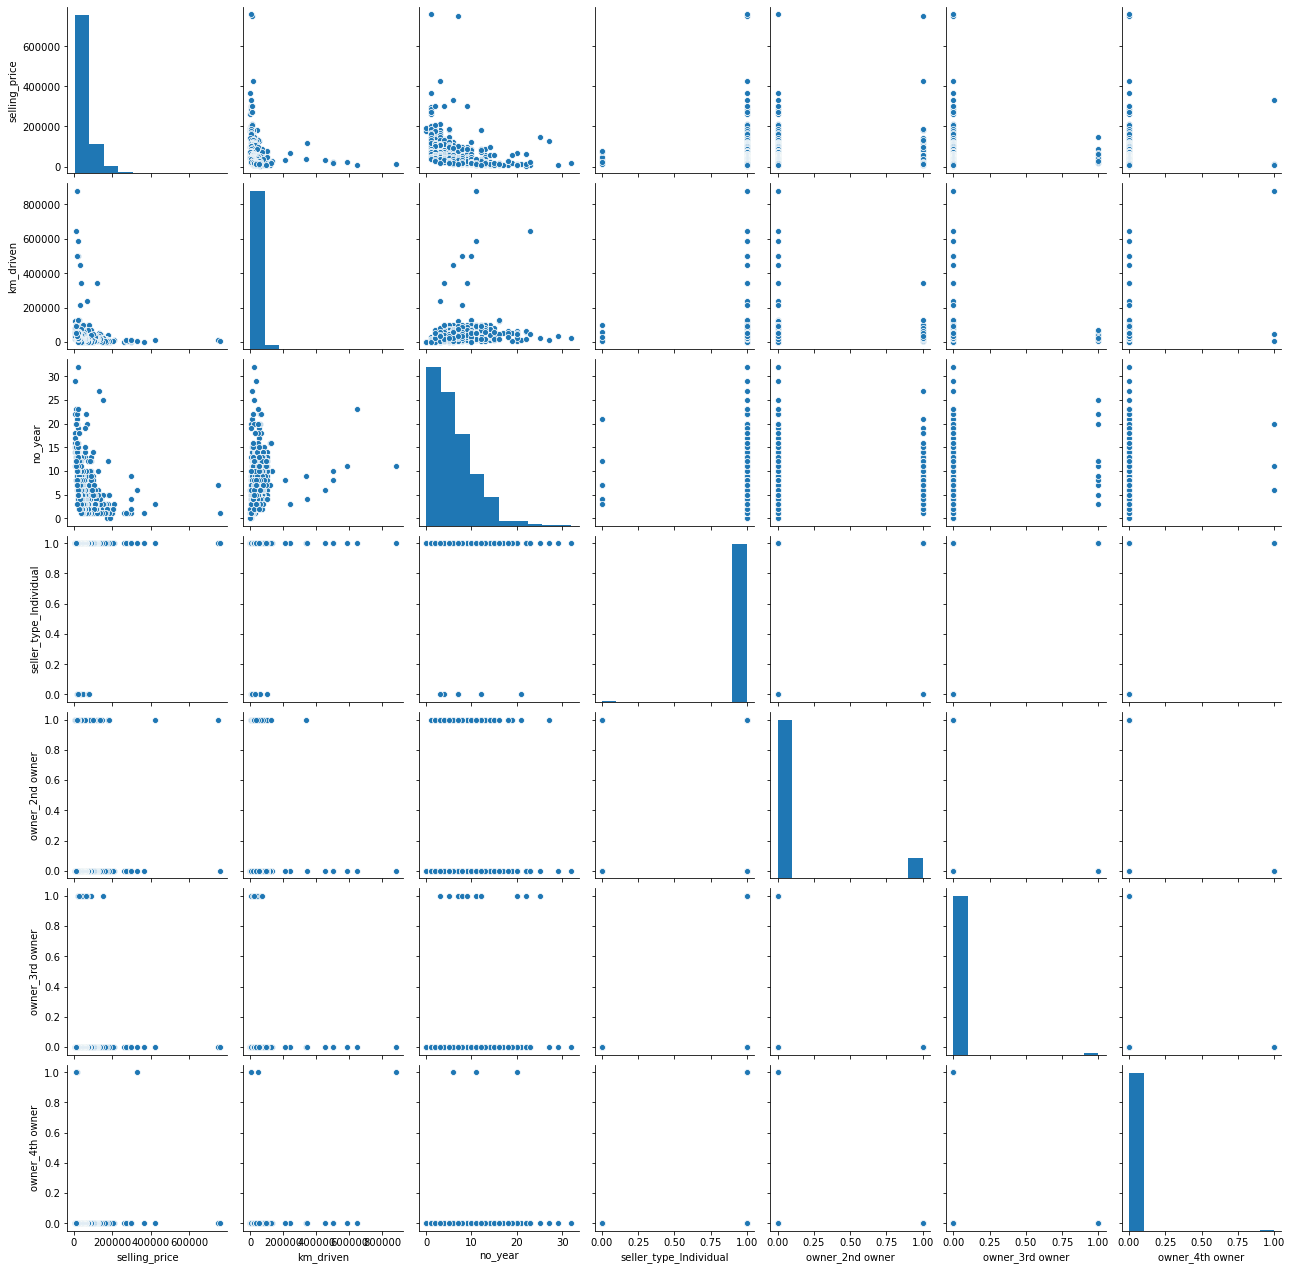

In [20]:
sns.pairplot(final_dataset)

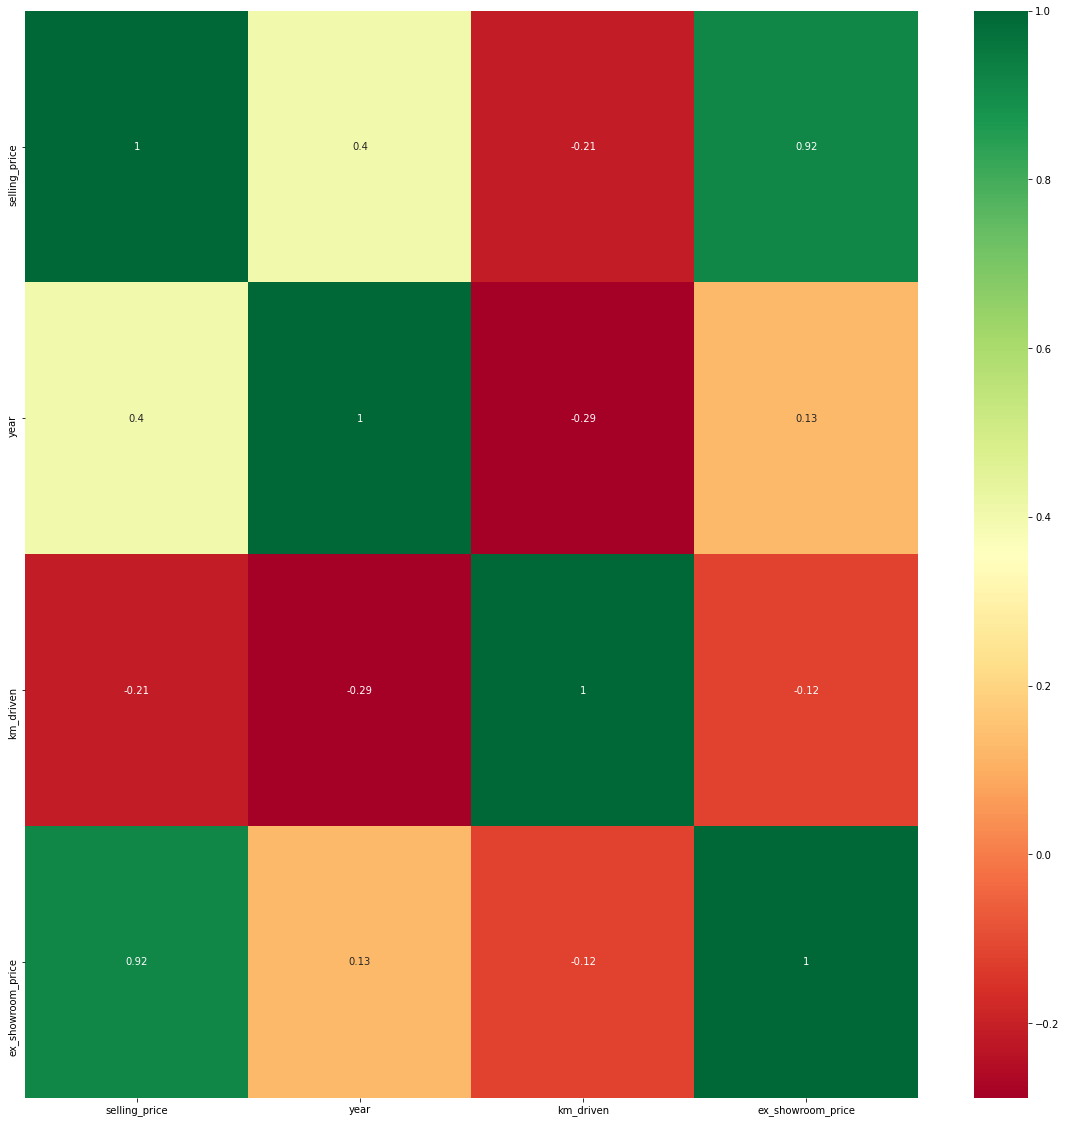

In [21]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
X=final_dataset.iloc[:,:6]
y=final_dataset.iloc[:,0]

In [23]:
X.head()

,selling_price,km_driven,no_year,seller_type_Individual,owner_2nd owner,owner_3rd owner
0,175000,350,1,1,0,0
1,45000,5650,3,1,0,0
2,150000,12000,2,1,0,0
3,65000,23000,5,1,0,0
4,20000,21000,9,1,1,0


In [24]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[9.71777938e-01 5.21778274e-03 2.16239434e-02 1.33543213e-07
 1.30994144e-03 7.02607645e-05]


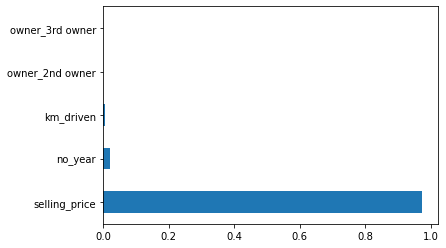

In [26]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
regressor=RandomForestRegressor()

In [30]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [33]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [35]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [36]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [37]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [38]:
rf_random.best_score_

-296157928.60453963

In [39]:
predictions=rf_random.predict(X_test)

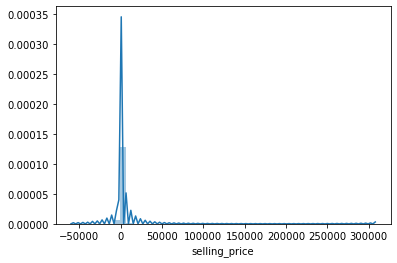

In [40]:
sns.distplot(y_test-predictions)

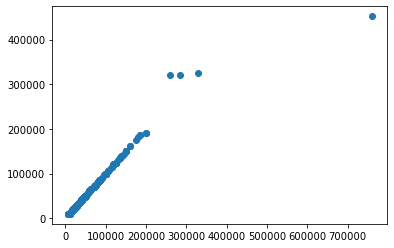

In [41]:
plt.scatter(y_test,predictions)

In [42]:
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1572.986418975842
MSE: 313088645.07468754
RMSE: 17694.311093531942


In [44]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

#dump information to that file
pickle.dump(rf_random, file)